# Two Heaps

This concept is quite simple, we basically divide a bag of numbers into 2 sets of equal size, where all numbers in one set is bigger than the other set.

> Q: Implement a Median finder, where new values are *inserted* into the set in real time, and we update *getMedian*

Naively, we can use a sorted array, however insertion takes $O(n)$ time due to shifting elements in the array. Getting the median (trivial given array length) is $O(1)$ time

Two heaps allows us to insert elements in $O(logn)$ time and get the median in $O(1)$ time.

## Approach

We maintain a **max-heap** and a **min-heap**

- In the **max-heap**, we store the **smaller half** of values
  - The root of max-heap will be the largest value in the smaller half
- In the **min-heap**, we store the **larger half** of values
  - The root of min-heap will be the smallest value in the larger half

Our setup contains 2 properties:
1. Order property: Every element in the larger heap must be greater than or equal all elements in the smaller heap
2. Size property: Both heaps have roughly equal size
     - size difference at most 1 - if its 1 means the median is the extra 1. If size difference 0 means median is average of 2 middle ones.

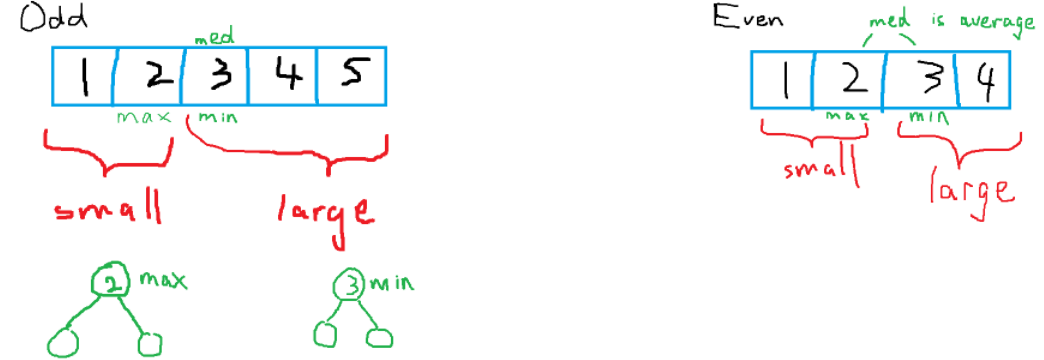

This means the median can be calculated by retrieving the max of the smaller heap and the min of the larger heap, and using the size difference between the 2 sets to deduce what is the median.

## Implementation

### Initialization

we have the max-heap containing the smaller half `small` and min-heap containing the larger half `large`

In [ ]:
import heapq

class Median:
    def __init__(self):
        self.small, self.large = [], []

### Insertion

> In some languages like Python, maxheaps arent supported natively. We simulate a max-heap by multiplying all the elems by -1

Rather than trying to identify which is the appropriate heap to insert the new element, we simply always insert into the max-heap `small` and do rebalancing.

1. Insert new elem into `small`
2. If the max of `small` is larger than the min of `large`, then move this max elem to `large` - this maintains the order property
3. If the size of the two heaps differ by more than 1, then transfer elements until the size property is satisfied

In [ ]:
def insert(self, num):
    # Push to the max heap and swap with min heap if needed.

    #maxheaps in python need multiply -1
    heapq.heappush(self.small, -1 * num)
    #check for the order property and transfer if neccessary
    if (self.small and self.large and (-1 * self.small[0]) > self.large[0]):
        val = -1 * heapq.heappop(self.small)
        heapq.heappush(self.large, val)

    # Handle uneven size
    #note that the size difference after we add an element can be at most 2, so we only need to transfer 1 element at most. Hence we only execute the below chunk once instead of having a loop.
    if len(self.small) > len(self.large) + 1:
        val = -1 * heapq.heappop(self.small)
        heapq.heappush(self.large, val)
    if len(self.large) > len(self.small) + 1:
        val = heapq.heappop(self.large)
        heapq.heappush(self.small, -1 * val)


**Odd Number of Elements example**

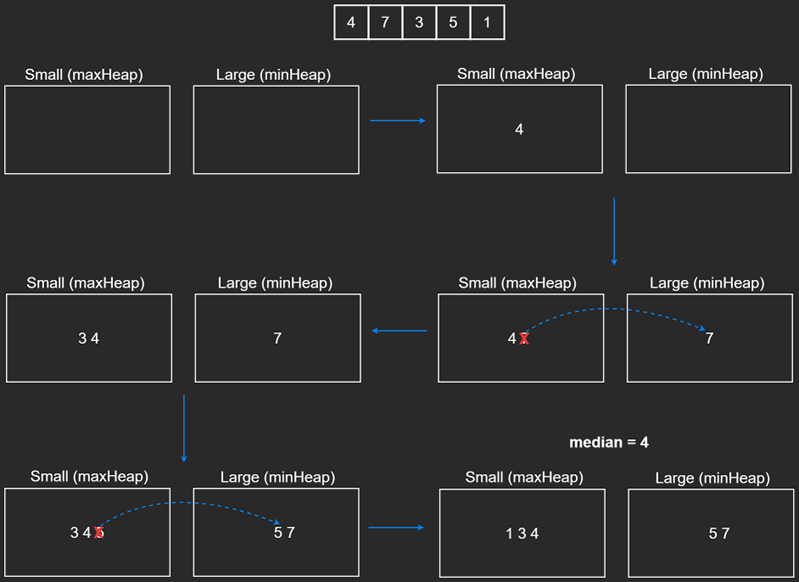

**Even Number of Elements example**

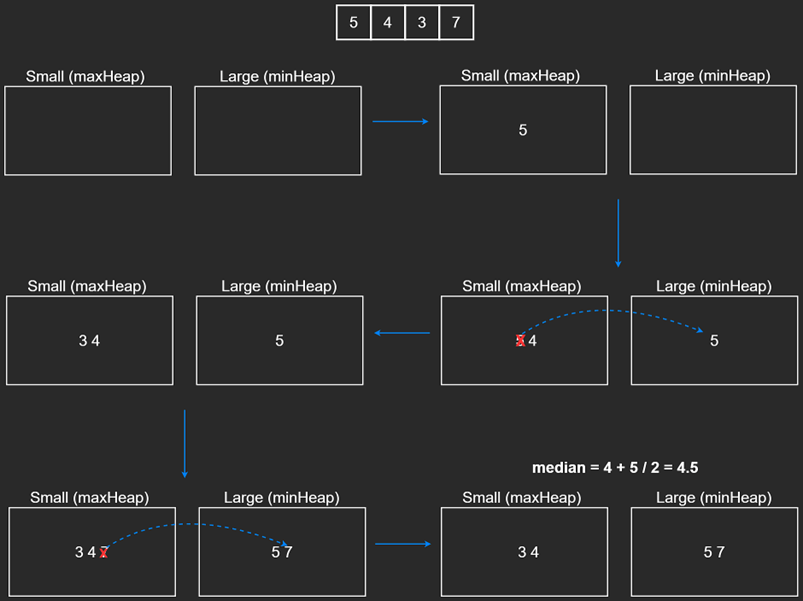

### Get Median

- If `small` is (one element) smaller than `large`, then the median must be the min of `large`
- If `small` is (one element) larger than `large`, then the median must be the max of `small`
- Else, both heaps have same size, that means we have even number of elements, we take the average of max of `small` and min of `large`

In [ ]:
def getMedian(self):
    if len(self.small) > len(self.large):
        #correct by -1 since maxheap is weird in python
        return -1 * self.small[0]
    elif len(self.large) > len(self.small):
        return self.large[0]

    # Even # of elements, return avg of two middle nums
    return (-1 * self.small[0] + self.large[0]) / 2


## Complexity

Time complexity is $O(logn)$ for insertion and $O(1)$ for getting median. Space complexity is $O(n)$ where $n$ is the total number of elements.